In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0, 10.0)
data = pd.read_csv("googleplaystore.csv")
print(data.shape)
data.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### The above output displays the dataset from a local csv file that we downloaded and describing the structure of the dataset

In [2]:
#data purification
data['Rating'].fillna(0, inplace = True)

def purify_rating(X):
    for ind,s in enumerate(X):
        if s>5:
            print(ind, s)
            X[ind]=s/10
    return X

def purify_price(s):
    s=s.replace("Everyone","0")
    return s.replace("$","")

def purify_installs(s):
    s=s.replace("+","")
    s=s.replace("Free","0")
    return s.replace(",","")

def purify_size(s):
    s=s.replace(",","")
    s=s.replace("+","")
    s=s.replace("M","")
    s=s.replace("k","")
    return s.replace("Varies with device","0")

#### Here we are preparing the data by:
- Manual analysis of dataset
- Removal of NaN values and replacing by a mean default value
- Next defining functions for removal of outlier data and symbols to get numeric features

10472 19.0
4751680.107882512 -1745831.172463091
6.0 -1.0


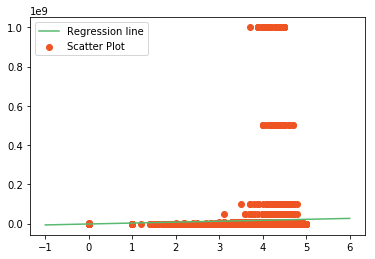

In [3]:
X = data['Rating'].values
Y = data['Installs'].values

X = purify_rating(X)
X = list(map(float, X))
Y = [purify_installs(s) for s in Y]
Y = list(map(float, Y))

# linear regression algorithm
mean_x=np.mean(X)
mean_y=np.mean(Y)
n=len(X)
number=0
denom=0
for i in range(n):
    number+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=number/denom
b0=mean_y-(b1*mean_x)

#printing slope and coefficient
print(b1,b0)
max_x=np.max(X)+1
min_x=np.min(X)-1
print(max_x,min_x)
x=np.linspace(min_x,max_x,100)
y=b0+b1*x

#plotting the linear regression line and the actual data points
plt.plot(x,y,color='#58b970',label='Regression line')
plt.scatter(X,Y,c='#ef5423',label='Scatter Plot')
plt.legend()
plt.show()

#### Now we select individual columns, purify them and use the manual algorithm to plot the graph along with its linear regression
##### Plotting Application Rating vs No of Installs

In [1]:
#manually finding the r2 score
ss_t=0
ss_r=0
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

#comparing manual score with sklearn library to verify
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = np.array(X)
X = X.reshape((n, 1))
reg=LinearRegression()
reg=reg.fit(X,Y)
Y_pred=reg.predict(X)
r2_score=reg.score(X,Y)
print(r2_score)

NameError: name 'n' is not defined

##### Plotting Application Price vs No of Installs

-62311.875562676156 15526923.74155729
-62311.875562676156 15526923.74155729
401.0 -1.0


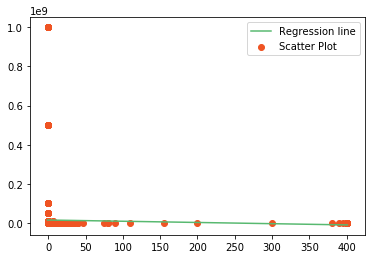

In [5]:
X = data['Price'].values
Y = data['Installs'].values

X = [purify_price(s) for s in X]
X = list(map(float, X))
Y = [purify_installs(s) for s in Y]
Y = list(map(float, Y))

# linear regression algorithm
mean_x=np.mean(X)
mean_y=np.mean(Y)
n=len(X)
number=0
denom=0
for i in range(n):
    number+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=number/denom
b0=mean_y-(b1*mean_x)

#printing slope and coefficient
print(b1,b0)

#printing slope and coefficient
print(b1,b0)
max_x=np.max(X)+1
min_x=np.min(X)-1
print(max_x,min_x)
x=np.linspace(min_x,max_x,100)
y=b0+b1*x

#plotting the linear regression line and the actual data points
plt.plot(x,y,color='#58b970',label='Regression line')
plt.scatter(X,Y,c='#ef5423',label='Scatter Plot')
plt.legend()
plt.show()

In [2]:
#manually finding the r2 score
ss_t=0
ss_r=0
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)
#comparing manual score with sklearn library to verify
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = np.array(X)
X=X.reshape((n,1))
reg=LinearRegression()
reg=reg.fit(X,Y)
Y_pred=reg.predict(X)
r2_score=reg.score(X,Y)
print(r2_score)

NameError: name 'n' is not defined

##### Plotting Application Size vs No of Installs

-24127.12083786032 16218905.400793657
-24127.12083786032 16218905.400793657
1021.0 -1.0


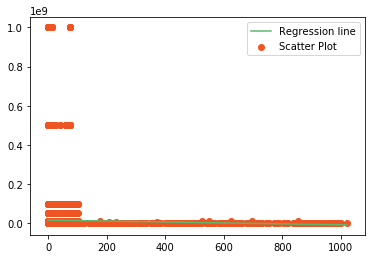

In [7]:
X = data['Size'].values
Y = data['Installs'].values

X = [purify_size(s) for s in X]
X = list(map(float, X))
Y = [purify_installs(s) for s in Y]
Y = list(map(float, Y))

# linear regression algorithm
mean_x=np.mean(X)
mean_y=np.mean(Y)
n=len(X)
number=0
denom=0
for i in range(n):
    number+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=number/denom
b0=mean_y-(b1*mean_x)

#printing slope and coefficient
print(b1,b0)

#printing slope and coefficient
print(b1,b0)
max_x=np.max(X)+1
min_x=np.min(X)-1
print(max_x,min_x)
x=np.linspace(min_x,max_x,100)
y=b0+b1*x

#plotting the linear regression line and the actual data points
plt.plot(x,y,color='#58b970',label='Regression line')
plt.scatter(X,Y,c='#ef5423',label='Scatter Plot')
plt.legend()
plt.show()

In [8]:
#manually finding the r2 score
ss_t=0
ss_r=0
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-mean_y)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

#comparing manual score with sklearn library to verify
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = np.array(X)
X = X.reshape((n, 1))
reg=LinearRegression()
reg=reg.fit(X,Y)
Y_pred=reg.predict(X)
r2_score=reg.score(X,Y)
print(r2_score)

0.0006855597945349956
0.000685559794536883


### Observations:
- We observed that the application size and price were inversely proportional to number of installs
- For latent manifold, we use size, price as inverses and in combination with sentiment analysis to predict the number of installs and further the popularity of the app.
- We can also think of the category as latent variable as apps in some categories will be installed more frequetly than the other.
- Words in customer reviews can also be a important factor in determinig the popularity.

In [91]:
#print (data)
#X1 = data[''].values
#print (X1)
print(data)
y = data.x[:,2:8]
#print (type(y))
y = np.delete(y,4,1)
y = np.delete(y,1,1)
#print (y)

y[:,0] = purify_rating(y[:,0])
y[:,0] = list(map(float, y[:,0]))

#print (y)

y[:,2] = [purify_installs(s) for s in y[:,2]]
y[:,2] = list(map(float, y[:,2]))

y[:,1]= [purify_size(s) for s in y[:,1]]
y[:,1] = list(map(float, y[:,1]))

y[:,3] = [purify_price(s) for s in y[:,3]]
y[:,3] = list(map(float, y[:,3]))
y= np.array(y)
print (y)

[Scatter({
    'marker': {'line': {'color': 'rgba(217, 217, 217, 0.14)', 'width': 0.5}, 'opacity': 0.8, 'size': 12},
    'mode': 'markers',
    'name': 'Iris-setosa',
    'x': array([-0.1464821 , -0.08384426, -0.47696882, ...,  1.5578388 , -0.3863899 ,
                -0.39194026]),
    'y': array([-0.08357963, -0.14332653, -0.01729467, ..., -0.84795958, -0.11480824,
                 0.01906361])
})]


AttributeError: 'Data' object has no attribute 'x'

#### Manually finding the Eigen values without using scikit learn library for better conceptual understanding:

In [50]:
#import sys
#!{sys.executable} -m pip install plotly
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
from plotly.graph_objs import *
import plotly.tools as tls

In [52]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(y)

print (X_std)

[[ 0.31586876 -0.13367438 -0.18175268 -0.06441298]
 [ 0.18381318 -0.1878649  -0.17598944 -0.06441298]
 [ 0.7120355  -0.24530685 -0.12306175 -0.06441298]
 ...
 [-2.39127064 -0.23663637 -0.18185854 -0.06441298]
 [ 0.57997992 -0.33959836 -0.18185854 -0.06441298]
 [ 0.57997992 -0.13367438 -0.06425319 -0.06441298]]


C:\Users\Hema\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.



In [12]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00009225 -0.02175243  0.08465078 -0.0163399 ]
 [-0.02175243  1.00009225 -0.02618561  0.01753045]
 [ 0.08465078 -0.02618561  1.00009225 -0.01168945]
 [-0.0163399   0.01753045 -0.01168945  1.00009225]]


In [13]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00009225 -0.02175243  0.08465078 -0.0163399 ]
 [-0.02175243  1.00009225 -0.02618561  0.01753045]
 [ 0.08465078 -0.02618561  1.00009225 -0.01168945]
 [-0.0163399   0.01753045 -0.01168945  1.00009225]]


In [14]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.64252039  0.70258761 -0.2637194  -0.15488796]
 [ 0.34128737 -0.04826641 -0.48974443 -0.80083936]
 [-0.64478032 -0.70835942 -0.28078425 -0.06037776]
 [ 0.23441163  0.04762293 -0.78215259  0.57534387]]

Eigenvalues 
[1.10255632 0.91513285 1.0013632  0.98131663]


In [15]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.64252039  0.70258761 -0.2637194  -0.15488796]
 [ 0.34128737 -0.04826641 -0.48974443 -0.80083936]
 [-0.64478032 -0.70835942 -0.28078425 -0.06037776]
 [ 0.23441163  0.04762293 -0.78215259  0.57534387]]

Eigenvalues 
[1.10245462 0.91504844 1.00127084 0.98122611]


In [29]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.64252039,  0.2637194 , -0.15488796, -0.70258761],
       [ 0.34128737,  0.48974443, -0.80083936,  0.04826641],
       [-0.64478032,  0.28078425, -0.06037776,  0.70835942],
       [ 0.23441163,  0.78215259,  0.57534387, -0.04762293]])

In [30]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [31]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.1024546172345087
1.0012708351506774
0.981226110363003
0.9150484372518116


In [53]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,5)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,5)], 
        y=cum_var_exp,
        name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [33]:

matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.64252039 -0.2637194 ]
 [ 0.34128737 -0.48974443]
 [-0.64478032 -0.28078425]
 [ 0.23441163 -0.78215259]]


In [34]:
Y = X_std.dot(matrix_w)

#### Using Scikit learn library:

In [45]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)
print (Y_sklearn)

[[-0.1464821  -0.08357963]
 [-0.08384426 -0.14332653]
 [-0.47696882 -0.01729467]
 ...
 [ 1.5578388  -0.84795958]
 [-0.3863899  -0.11480824]
 [-0.39194026  0.01906361]]


In [69]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
traces = []
trace = Scatter(
        x=Y_sklearn[:,0],
        y=Y_sklearn[:,1],
        mode='markers',
        name=name,
        marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))
traces.append(trace)


data = Data(traces)
layout = Layout(xaxis=XAxis(title='PC1', showline=False),
                yaxis=YAxis(title='PC2', showline=False))
fig = Figure(data=data, layout=layout)
py.iplot(fig)

#### Observation:
PC1 and PC2 were more closely related to a linear model and we presume latent variable in PC1 is the the number of installs as they vary the highest.
